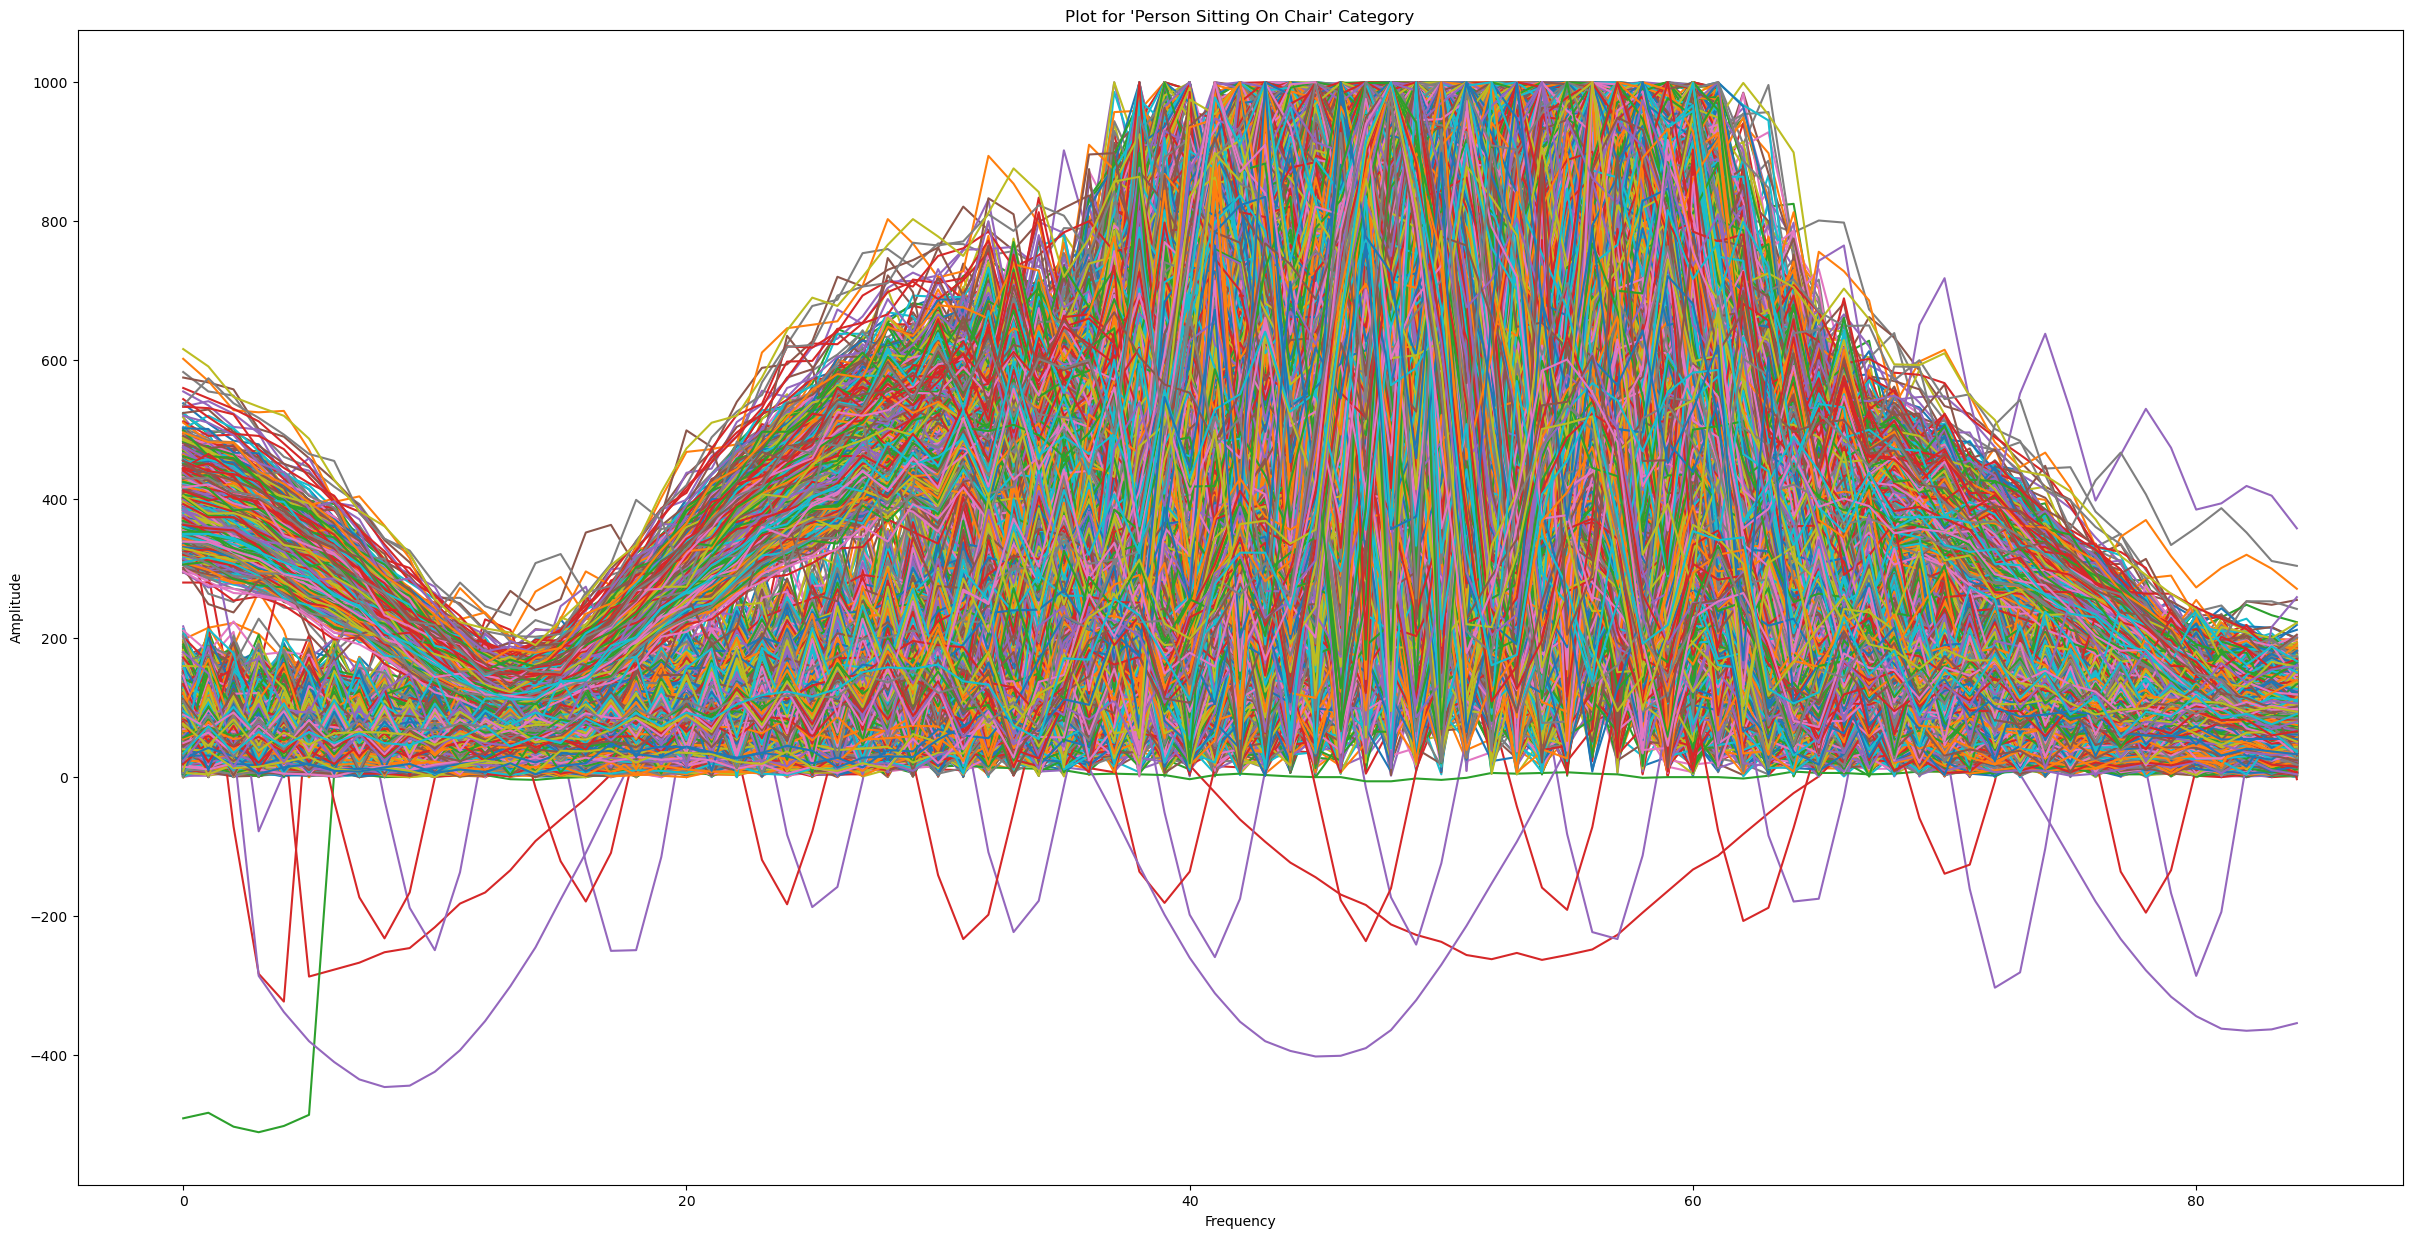

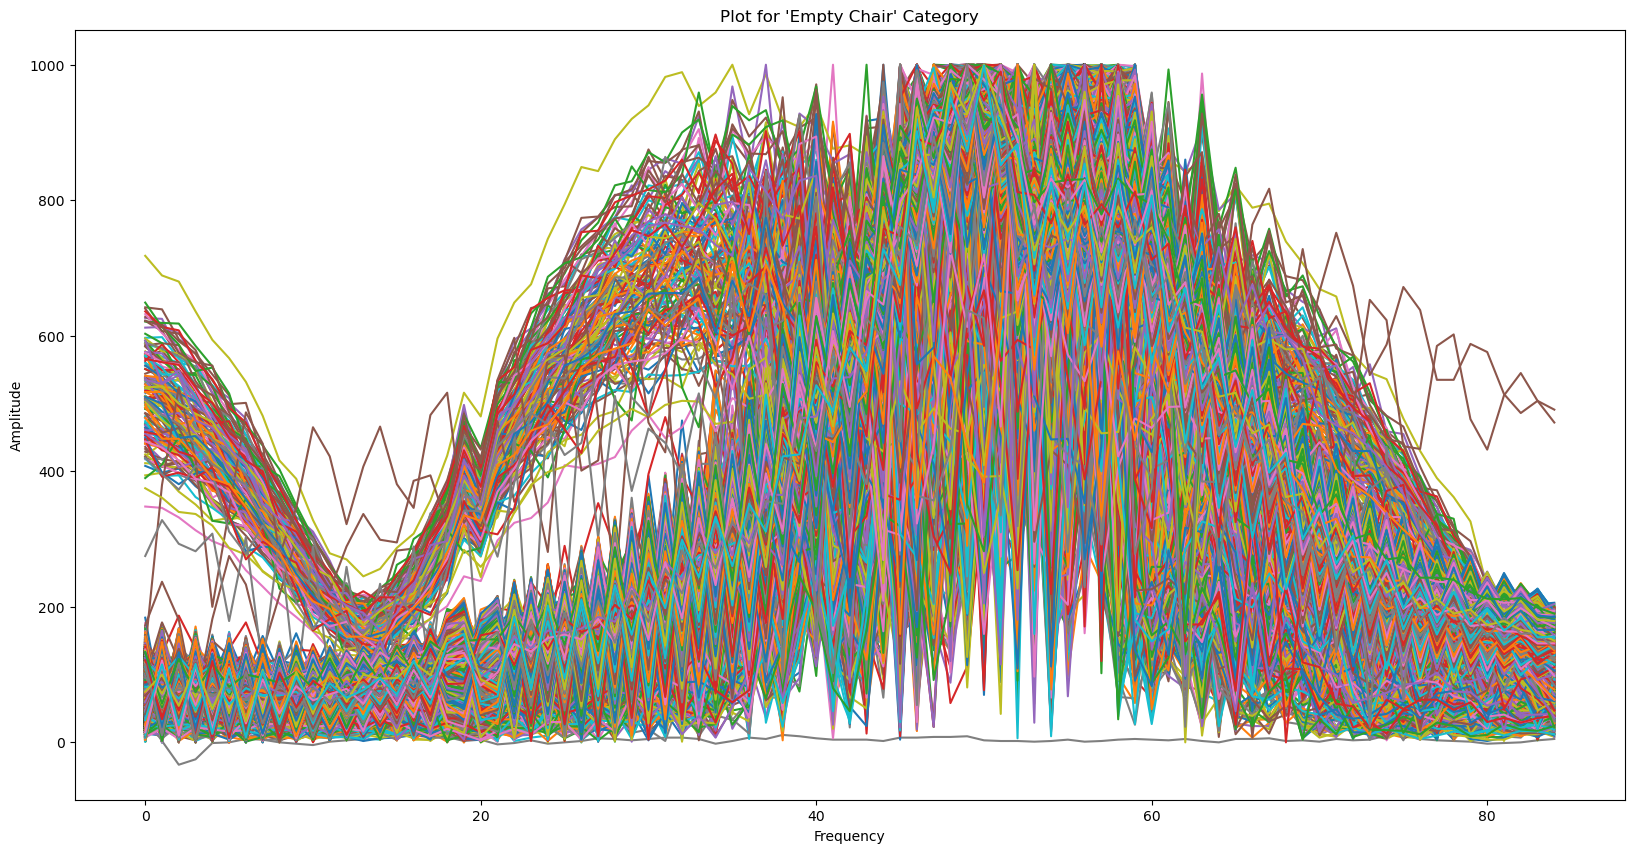

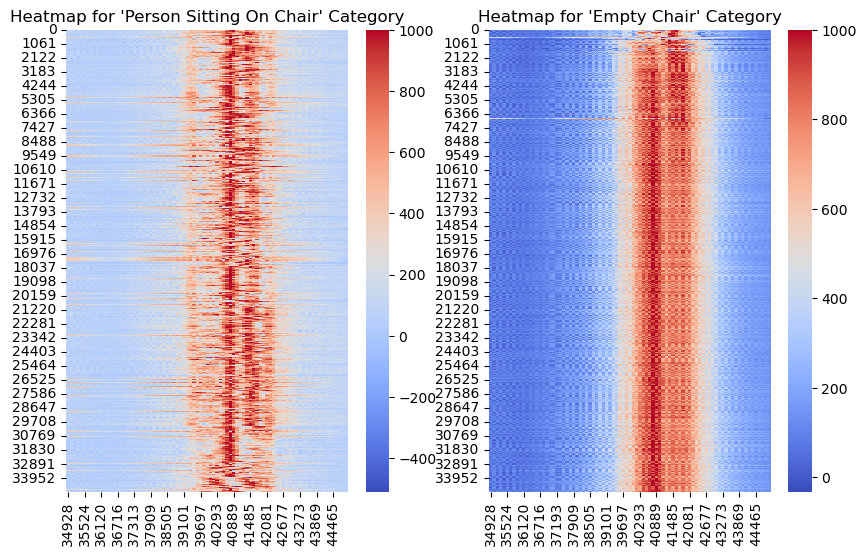

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df_person = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8p0GyNMXdltCl8DiRCKwDjCkgk6ETNaA-2n5s1TD9tdkjxtGbdtlWcsOI12neVr_6EbIkOg7i9vun/pub?output=csv")  # Replace with the path to your "person sitting on chair" dataset
df_empty = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-zAJ8pKEY-dPqMVIRwvGSmcOQsz52Dt1FbCCANS_MLaAxWEd5qPTZjqQi53oEAZ8Th5Ife4ujKEwb/pub?output=csv")  # Replace with the path to your "empty chair" dataset

# Step 2: Plot sensor measurement values for a subset of rows
num_rows = 35000  # Number of rows to plot (adjust as needed)

plt.figure(figsize=(30, 15))
for i in range(num_rows):
    row_values = df_person.iloc[i, :].values
    plt.plot(row_values, label="Person Sitting On Chair")
    
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Plot for 'Person Sitting On Chair' Category")
#plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
for i in range(num_rows):
    row_values = df_empty.iloc[i, :].values
    plt.plot(row_values, label="Empty Chair")

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Plot for 'Empty Chair' Category")
#plt.legend()
plt.show()

# Step 3: Generate heatmaps
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot heatmap for "Person Sitting On Chair" category
sns.heatmap(df_person.iloc[:num_rows, :], cmap="coolwarm", ax=axes[0])
axes[0].set_title("Heatmap for 'Person Sitting On Chair' Category")

# Plot heatmap for "Empty Chair" category
sns.heatmap(df_empty.iloc[:num_rows, :], cmap="coolwarm", ax=axes[1])
axes[1].set_title("Heatmap for 'Empty Chair' Category")

plt.show()


In [30]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import the datasets
df_person = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8p0GyNMXdltCl8DiRCKwDjCkgk6ETNaA-2n5s1TD9tdkjxtGbdtlWcsOI12neVr_6EbIkOg7i9vun/pub?output=csv")  # Replace with the path to your "person sitting on chair" dataset
df_empty = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-zAJ8pKEY-dPqMVIRwvGSmcOQsz52Dt1FbCCANS_MLaAxWEd5qPTZjqQi53oEAZ8Th5Ife4ujKEwb/pub?output=csv")  # Replace with the path to your "empty chair" dataset

df_person.shape

(35000, 85)

Accuracy: 0.9843142857142857
Precision: 0.986454686334156
Recall: 0.9821142857142857
F1 Score: 0.9842797010566103


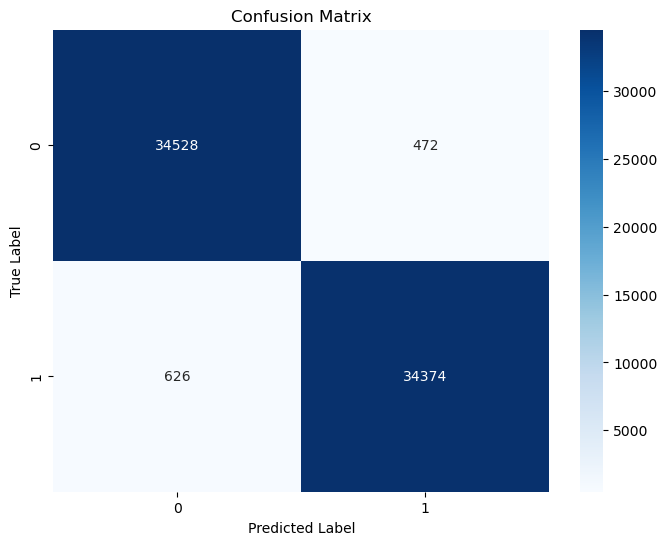

In [15]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import the datasets
df_person = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8p0GyNMXdltCl8DiRCKwDjCkgk6ETNaA-2n5s1TD9tdkjxtGbdtlWcsOI12neVr_6EbIkOg7i9vun/pub?output=csv")  # Replace with the path to your "person sitting on chair" dataset
df_empty = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-zAJ8pKEY-dPqMVIRwvGSmcOQsz52Dt1FbCCANS_MLaAxWEd5qPTZjqQi53oEAZ8Th5Ife4ujKEwb/pub?output=csv")  # Replace with the path to your "empty chair" dataset

# Step 2: Combine the datasets
df_combined = pd.concat([df_person, df_empty], axis=0)  # Combine the datasets

# Step 3: Set the target variable
target_person = np.ones(len(df_person))  # Assign target value 1 for "person sitting on chair" dataset
target_empty = np.zeros(len(df_empty))  # Assign target value 0 for "empty chair" dataset
target_combined = np.concatenate([target_person, target_empty], axis=0)  # Combine the target values

# Step 4: Train the SVM model
svm_model_training = SVC(kernel='linear')
svm_model_training.fit(df_combined.values, target_combined)

# Step 5: Evaluate the model
predictions = svm_model_training.predict(df_combined.values)

accuracy = accuracy_score(target_combined, predictions)
precision = precision_score(target_combined, predictions)
recall = recall_score(target_combined, predictions)
f1 = f1_score(target_combined, predictions)

conf_matrix = confusion_matrix(target_combined, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Saving the Trained SVM Model

In [16]:
from sklearn.svm import SVC
import sklearn.externals
import joblib

# Step 4: Train the SVM model
svm_model_training = SVC(kernel='linear')
svm_model_training.fit(df_combined.values, target_combined)

# Save the trained model
joblib.dump(svm_model_training, "svm_model.pkl")


['svm_model.pkl']

### Loading new & unseen datasets to Test the trained SVM model

C:\Users\a.nalakath\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation Metrics - Person Sitting:
Accuracy: 0.9742
Precision: 1.0
Recall: 0.9742
F1 Score: 0.9869314152568128

Evaluation Metrics - Empty Chair:
Accuracy: 0.9990666666666667
Precision: 0.0
Recall: 0.0
F1 Score: 0.0



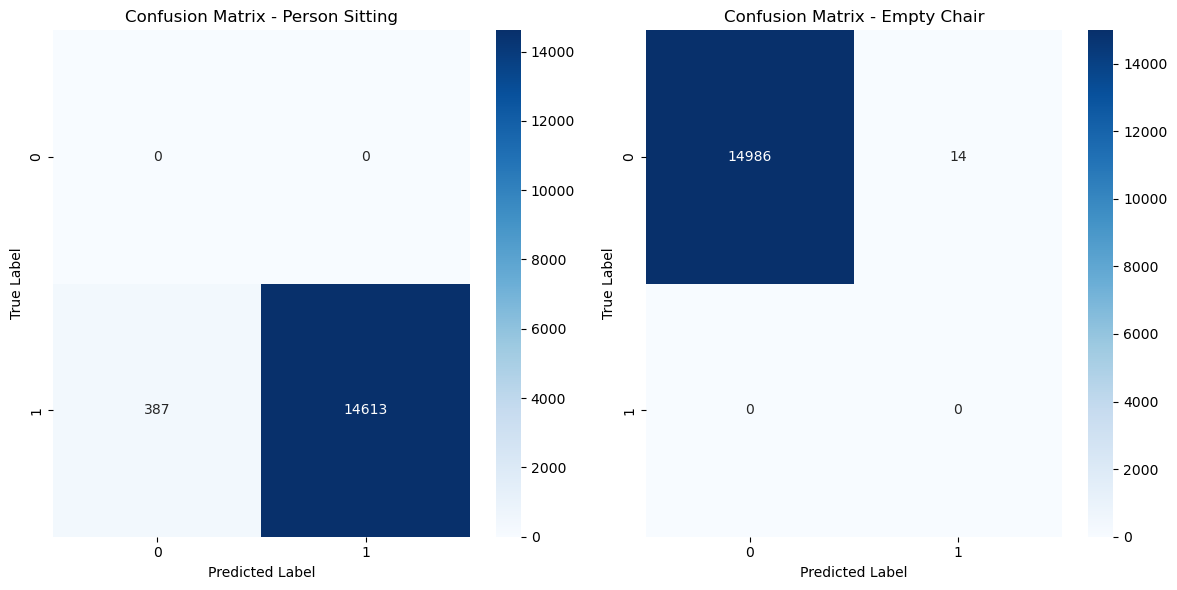

In [26]:
import numpy as np+
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the unseen datasets
df_person_unseen = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTK6yK_0k9pIr2w0TmEoYlHWN4eIoA8zUNtGLKTlV_BUW5YEb0bWu_b8QhobSoEGlNHSkLni43fCc8J/pub?output=csv")  # Replace with the path to your unseen "Person Sitting" dataset
df_empty_unseen = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS4P1F4Fm1dgwvS3VTFIbJbLyzfTswDoXvUOPmi-HnLSGyJVVZZIGa5MjuXMJcEQQcicN5-6bsTjJyH/pub?output=csv")  # Replace with the path to your unseen "Empty Chair" dataset

# Step 2: Prepare the unseen datasets for evaluation
X_person_unseen = df_person_unseen.values
X_empty_unseen = df_empty_unseen.values

# Step 3: Load the trained SVM model
svm_model = SVC(kernel='linear')
svm_model = joblib.load("svm_model.pkl")  # Replace with the path to your trained SVM model file

# Step 4: Predict labels for the unseen datasets
y_person_unseen_pred = svm_model.predict(X_person_unseen)
y_empty_unseen_pred = svm_model.predict(X_empty_unseen)

# Step 5: Create true labels for the unseen datasets
y_person_unseen_true = np.ones(len(df_person_unseen))  # Assuming all instances in "Person Sitting" dataset are positive
y_empty_unseen_true = np.zeros(len(df_empty_unseen))  # Assuming all instances in "Empty Chair" dataset are negative

# Step 6: Evaluate the model performance
accuracy_person_unseen = accuracy_score(y_person_unseen_true, y_person_unseen_pred)
accuracy_empty_unseen = accuracy_score(y_empty_unseen_true, y_empty_unseen_pred)
r
precision_person_unseen = precision_score(y_person_unseen_true, y_person_unseen_pred)
precision_empty_unseen = precision_score(y_empty_unseen_true, y_empty_unseen_pred)

recall_person_unseen = recall_score(y_person_unseen_true, y_person_unseen_pred)
recall_empty_unseen = recall_score(y_empty_unseen_true, y_empty_unseen_pred)

f1_person_unseen = f1_score(y_person_unseen_true, y_person_unseen_pred)
f1_empty_unseen = f1_score(y_empty_unseen_true, y_empty_unseen_pred)

conf_matrix_person_unseen = confusion_matrix(y_person_unseen_true, y_person_unseen_pred)
conf_matrix_empty_unseen = confusion_matrix(y_empty_unseen_true, y_empty_unseen_pred)

# Step 7: Print the evaluation metrics
print("Evaluation Metrics - Person Sitting:")
print("Accuracy:", accuracy_person_unseen)
print("Precision:", precision_person_unseen)
print("Recall:", recall_person_unseen)
print("F1 Score:", f1_person_unseen)
print()

print("Evaluation Metrics - Empty Chair:")
print("Accuracy:", accuracy_empty_unseen)
print("Precision:", precision_empty_unseen)
print("Recall:", recall_empty_unseen)
print("F1 Score:", f1_empty_unseen)
print()

# Step 8: Plot the confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_person_unseen, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Person Sitting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_empty_unseen, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Empty Chair")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()